# Garbage image classification

## Aggregating data, creating data set

We bring our folder images and we create a data frame.

In [20]:
import os
import pandas as pd

def list_folders_in_directory(directory):
    folders = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folders

directory_path = "./garbage-images/Garbage classification/Garbage classification"
folders_list = list_folders_in_directory(directory_path)
print(folders_list)


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [21]:
data = []
for folder in folders_list: 
    files = os.listdir(os.path.join(directory_path, folder))
    #Add each file along with its folder name to the data list
    for file in files:
        data.append({'Folder': folder, 'File_name': file})

# Create a DataFrame from the data list
df = pd.DataFrame(data)

# Display the DataFrame
df.head()



,Folder,File_name
0,cardboard,cardboard1.jpg
1,cardboard,cardboard10.jpg
2,cardboard,cardboard100.jpg
3,cardboard,cardboard101.jpg
4,cardboard,cardboard102.jpg


## Analising the data

First we are checking our data set to see how manny photos we have.

In [22]:
df.shape

(2527, 2)

We want to check how manny images we have in each category.

In [23]:
df['Folder'].value_counts()

Folder
paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: count, dtype: int64

We have some inbalance data in 'trash'

We want to see what file format we have in the dataset.

We can see that we have only 'jpg' files.

In [24]:
# Extract extension using str.split and str.get
df['Extension'] = df['File_name'].str.split('.').str[-1]

df['Extension'].value_counts()


Extension
jpg    2527
Name: count, dtype: int64

We want to check the dimension of images.

We are adding the dimensions of the image into the dataframe with the help of Pillow library

In [25]:
from PIL import Image

def get_image_dimensions(df_row):
    file_path = os.path.join(directory_path, df_row['Folder'], df_row['File_name'])
    image = Image.open(file_path)
    width, height = image.size
    return width, height

df['Image_width'], df['Image_height'] = zip(*df.apply(get_image_dimensions, axis=1))

df.head()

,Folder,File_name,Extension,Image_width,Image_height
0,cardboard,cardboard1.jpg,jpg,512,384
1,cardboard,cardboard10.jpg,jpg,512,384
2,cardboard,cardboard100.jpg,jpg,512,384
3,cardboard,cardboard101.jpg,jpg,512,384
4,cardboard,cardboard102.jpg,jpg,512,384


We are checking how many different values we are having in those two columns.

It seems that all the files have the same size. This means that we do not need to do any transformation to the size of the files.

In [26]:
print(df.Image_width.value_counts())
print(30*'*')
print(df.Image_height.value_counts())

Image_width
512    2527
Name: count, dtype: int64
******************************
Image_height
384    2527
Name: count, dtype: int64


## Data processing

We need to load the data to normalise it, and split the data in training dataset and validation dataset.

In [27]:
import tensorflow as tf

# Define the directory containing your dataset
data_directory = "./garbage-images/Garbage classification/Garbage classification"

# Define image parameters
image_
image_size = (384, 512)
batch_size = 32


# Create a TensorFlow Dataset object
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    labels="inferred",  # Labels are inferred from subfolder names
    label_mode="int",  # Use integer labels
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    labels="inferred",  # Labels are inferred from subfolder names
    label_mode="int",  # Use integer labels
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)




Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


Here we can see that we created a dataset with 6 classes

In [28]:
class_names = train_dataset.class_names
print("Class names:", class_names)


Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


Data visualisation of 5 images from each class

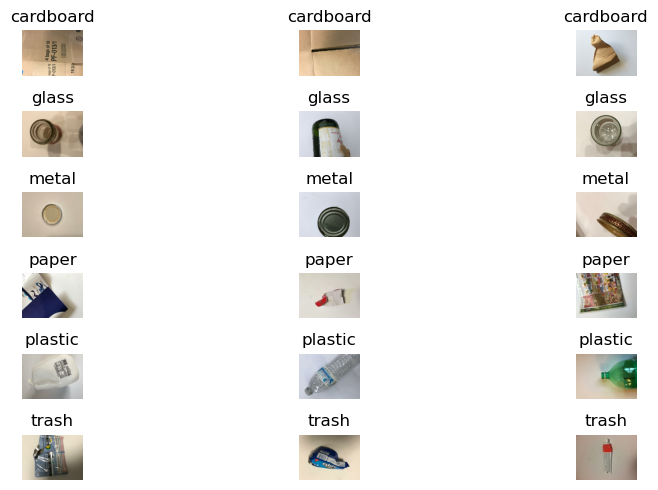

In [29]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
plt.figure(figsize=(10, 5))

num_images_per_class = 3

for class_index, class_name in enumerate(class_names):
    class_images = []
    for images, labels in train_dataset:
        class_images.extend(images[labels == class_index].numpy())
        if len(class_images) >= num_images_per_class:
            break
    
    for k in range(num_images_per_class):
        if k < len(class_images):
            plt.subplot(len(class_names), num_images_per_class, class_index * num_images_per_class + k + 1)
            plt.imshow(class_images[k].astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

plt.tight_layout()
plt.show()

We take a look on what we have in train data set

In [30]:
for images, labels in train_dataset:
    print("Image batch shape:", images)
    print("Label batch shape:", labels)
    print("Label batch type:", labels.dtype)
    break  # Print only the first batch

Image batch shape: tf.Tensor(
[[[[ 86.  67.  37.]
   [ 86.  67.  37.]
   [ 86.  67.  37.]
   ...
   [187. 179. 166.]
   [185. 177. 164.]
   [184. 176. 163.]]

  [[ 86.  67.  37.]
   [ 86.  67.  37.]
   [ 86.  67.  37.]
   ...
   [189. 181. 168.]
   [187. 179. 166.]
   [185. 177. 164.]]

  [[ 86.  67.  37.]
   [ 86.  67.  37.]
   [ 86.  67.  37.]
   ...
   [190. 182. 169.]
   [188. 180. 167.]
   [186. 178. 165.]]

  ...

  [[ 86.  69.  39.]
   [ 86.  69.  39.]
   [ 85.  68.  38.]
   ...
   [194. 190. 179.]
   [192. 188. 177.]
   [192. 188. 177.]]

  [[ 87.  70.  40.]
   [ 86.  69.  39.]
   [ 85.  68.  38.]
   ...
   [191. 187. 176.]
   [191. 187. 176.]
   [191. 187. 176.]]

  [[ 87.  70.  40.]
   [ 86.  69.  39.]
   [ 86.  69.  39.]
   ...
   [189. 185. 174.]
   [189. 185. 174.]
   [190. 186. 175.]]]


 [[[210. 214. 225.]
   [209. 213. 224.]
   [209. 213. 224.]
   ...
   [147. 151. 162.]
   [147. 151. 162.]
   [146. 150. 161.]]

  [[209. 213. 224.]
   [209. 213. 224.]
   [209. 213. 224.

Now we need to normalise the data

In [31]:
normalization_layer = tf.keras.layers.Rescaling(scale = 1./255)

normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
normalized_val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

for images, labels in normalized_train_dataset:
    print("Image batch shape after normalization:", images)
    print("Label batch shape after normalization:", labels)
    print("Label batch type:", labels.dtype)
    break  # Print only the first batch


Image batch shape after normalization: tf.Tensor(
[[[[0.9333334  0.9294118  0.91372555]
   [0.9294118  0.92549026 0.909804  ]
   [0.9294118  0.92549026 0.909804  ]
   ...
   [0.6039216  0.5882353  0.54509807]
   [0.6039216  0.5882353  0.54509807]
   [0.6        0.58431375 0.5411765 ]]

  [[0.9294118  0.92549026 0.909804  ]
   [0.9294118  0.92549026 0.909804  ]
   [0.9294118  0.92549026 0.909804  ]
   ...
   [0.6039216  0.5882353  0.54509807]
   [0.6039216  0.5882353  0.54509807]
   [0.6        0.58431375 0.5411765 ]]

  [[0.9294118  0.92549026 0.909804  ]
   [0.9294118  0.92549026 0.909804  ]
   [0.9294118  0.92549026 0.909804  ]
   ...
   [0.6039216  0.5882353  0.54509807]
   [0.6039216  0.5882353  0.54509807]
   [0.6        0.58431375 0.5411765 ]]

  ...

  [[0.8078432  0.79215693 0.74509805]
   [0.8078432  0.79215693 0.74509805]
   [0.8078432  0.79215693 0.74509805]
   ...
   [0.6        0.58431375 0.5372549 ]
   [0.6        0.58431375 0.5372549 ]
   [0.6        0.58431375 0.5372549

## Define the model

Now that we have our data normalized we need to define the convolutional model


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Define the convolutional neural network architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(384, 512, 3)),  # Input
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),                             
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),                                       
    Dense(6, activation='softmax')  # We have Dense 6 , because we have 6 classes of images
])


We can take a look on the model summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 382, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 191, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 126, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 124, 64)       36928     
                                                                 
 flatten (Flatten)           (None, 730112)            0

We compile the model and set the loss to SparseCategoricalCrossentropy

In [116]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


We create a function to stop the training when accuracy reach 90% to prevent the model overfitting

In [117]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

We train the model

In [124]:
epochs = 10
history = model.fit(normalized_train_dataset, validation_data = normalized_val_dataset, epochs=epochs, callbacks=[callbacks])

Epoch 1/10


64/64 [==============================] - 342s 5s/step - loss: 1.4948 - accuracy: 0.4313 - val_loss: 1.5734 - val_accuracy: 0.3683
Epoch 2/10
64/64 [==============================] - 346s 5s/step - loss: 1.3868 - accuracy: 0.4921 - val_loss: 1.5145 - val_accuracy: 0.3683
Epoch 3/10
64/64 [==============================] - 378s 6s/step - loss: 1.2124 - accuracy: 0.5603 - val_loss: 1.4355 - val_accuracy: 0.4416
Epoch 4/10
64/64 [==============================] - 325s 5s/step - loss: 0.9257 - accuracy: 0.6771 - val_loss: 1.7529 - val_accuracy: 0.4059
Epoch 5/10
64/64 [==============================] - 276s 4s/step - loss: 0.9280 - accuracy: 0.6637 - val_loss: 2.3440 - val_accuracy: 0.3683
Epoch 6/10
64/64 [==============================] - 270s 4s/step - loss: 0.6427 - accuracy: 0.7666 - val_loss: 2.8546 - val_accuracy: 0.3802
Epoch 7/10
64/64 [==============================] - 272s 4s/step - loss: 0.3922 - accuracy: 0.8670 - val_loss: 3.2245 - val_accuracy: 0.3465
Epoch 8/10
64/64 [======

Here we take a look on the model metrics on loss and accuracy

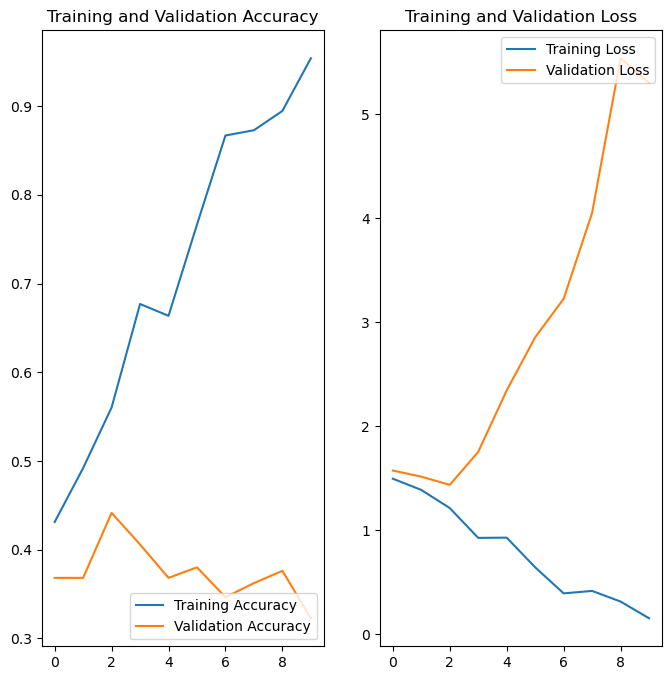

In [125]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [126]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(normalized_val_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 13s 772ms/step - loss: 5.3013 - accuracy: 0.3228
Test Loss: 5.301254749298096
Test Accuracy: 0.3227722644805908


Now that we are happy with our model accuracy we can save the model

In [127]:
model.save('first_model')

INFO:tensorflow:Assets written to: first_model/assets


INFO:tensorflow:Assets written to: first_model/assets


Now let's try to make a prediction with an image

Image loaded successfully as a TensorFlow tensor.
1/1 [==============================] - 0s 95ms/step
cardboard
0.50191694
[[5.0191694e-01 4.8797774e-01 2.3410229e-09 1.0103606e-02 1.7123739e-06
  1.3088343e-16]]


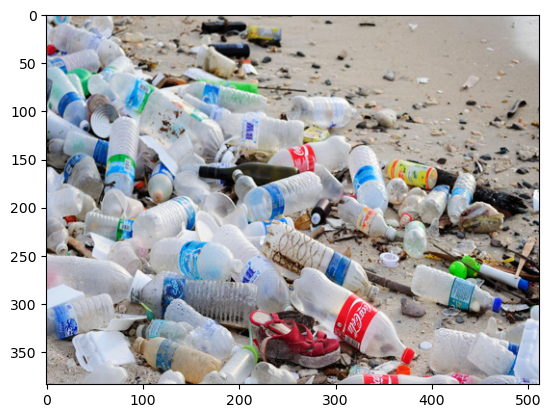

In [138]:
import numpy as np

image = Image.open('/Users/admin/Desktop/26534726534.jpeg')

# Resize the image to the desired size
image = image.resize((512, 384))  # Replace 'width' and 'height' with desired dimensions

# Convert the image to a numpy array
image_array = np.array(image)

# Convert the numpy array to a TensorFlow tensor
image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32) / 255.0

# Expand the dimensions of the tensor to match the expected input shape
image_tensor = tf.expand_dims(image_tensor, axis=0)

print("Image loaded successfully as a TensorFlow tensor.")

predictions = model.predict(image_tensor)
predicted_index = np.argmax(predictions)
predicted_label = class_names[predicted_index]
print(predicted_label)
print(np.max(predictions))
plt.imshow(image)
print(predictions)
